# This is the study of HIV patients' FAZ
Very interesting

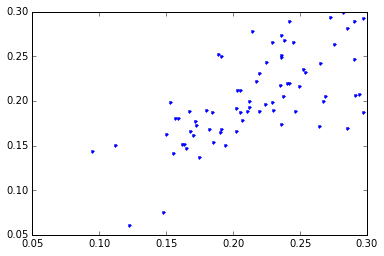

(Correlation, two-tailed p-value):
(0.67475106914537797, 4.3434815643941094e-11)


Age distribution all patients


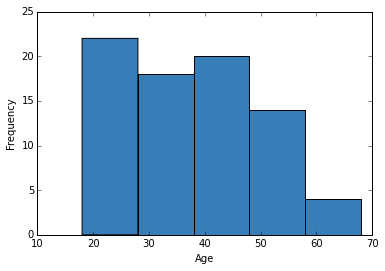

Group 1


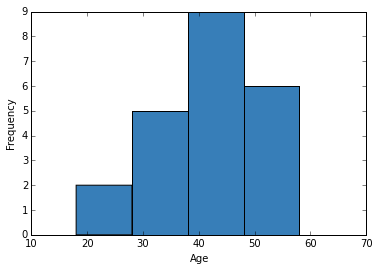

Group 2


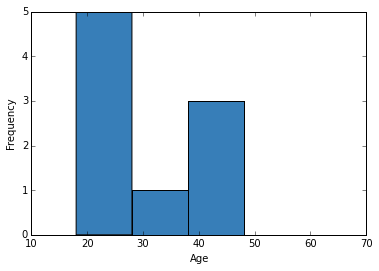

Group 3


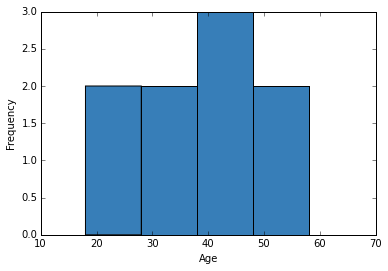

Group 4


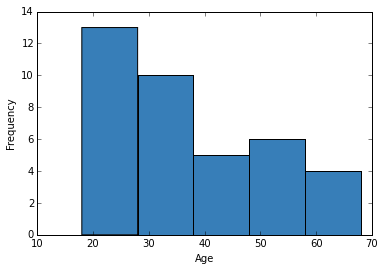

In [255]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages


ana = pd.read_csv('ana.csv', quotechar='"', skipinitialspace=True, delimiter=',',na_values='NA')

#how many study groups do we have?
groups = 4


plt.plot(ana["L"],ana["R"],".")
plt.show()

pp = PdfPages('corr.pdf')
plt.savefig(pp, format='pdf')

print "(Correlation, two-tailed p-value):"
print stats.stats.pearsonr(ana.dropna(how='any')["L"],ana.dropna(how='any')["R"])
print "\n"


print "Age distribution all patients"
age = ana['AGE']
n, bins, patches = plt.hist(age, bins, normed=0, facecolor='#377EB8')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


#age bins
bins = [18, 28, 38,48, 58, 68]

hist_counts = [0]*groups
min_count = [0]*(groups-1)

for i in range(1,groups+1):
    print "Group %d" % (i)
    age = ana.where(ana.GROUP==i).AGE
    n, bins, patches = plt.hist(age, bins, normed=0, facecolor='#377EB8')
    hist_counts[i-1]=n
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Experiments
Here we create the frequency-matched groups and compare their group means

In [263]:

#traverse the study groups and create two groups of equal age group frequencies
for i in range(1,groups):
    min_count[i-1] = [0]*bins.size
    for j in range(0,bins.size-1):
        min_count[i-1][j] = min(hist_counts[i-1][j],hist_counts[3][j]).astype(int)

#for i in range(0,groups-1):   
#    print "Observations for experiment %d: %d"%(i+1, sum(min_count[i]))
    
#print(bins[1]-1)
#print ana[(ana.GROUP==2)]["AGE"]

exp_group = [[0]*bins.size]*(groups-1)
cont_group = [[0]*bins.size]*(groups-1)

for i in range(0,groups-1):  
    limit = min_count[i]
    #print limit
    #traverse bins
    for j in range(0,bins.size):
        maxage = -1.
        if (j < bins.size-1):
            maxage = (bins[j+1])
        else:
            maxage = max(ana["AGE"])
        exp_group[i][j] = ana[(ana.GROUP==(i+1)) & (ana.AGE>=bins[j]) & (ana.AGE<maxage)][:(limit[j])]
        cont_group[i][j] = ana[(ana.GROUP==4) & (ana.AGE>=bins[j]) & (ana.AGE<(maxage))][:(limit[j])]       
        #now calc and compare means
    exp_tot = pd.concat(exp_group[i])
    exp_LR = pd.concat([exp_tot["L"],exp_tot["R"]]).dropna(how='any');
    cont_tot = pd.concat(cont_group[i])
    cont_LR = pd.concat([cont_tot["L"],cont_tot["R"]]).dropna(how='any')[:exp_LR.size];
    
    print "\n-------------"
    print "Study %d"%(i+1)
    print "-------------"
    print "count: %d"%(exp_LR.size*2)
    print "study mean: %f"%np.mean(exp_LR)
    #print "control count: %d"%cont_LR.size
    print "control mean: %f"%np.mean(cont_LR)
    ttest = stats.ttest_ind(exp_LR,cont_LR)
    print "\nt-test statistics: %f"%ttest[0]
    print "two-sided p-value: %f"%ttest[1]
    print "-------------\n"

for i in range(0,groups-1):  
    limit = min_count[i]
    #print limit
    #traverse bins
    for j in range(0,bins.size):
        maxage = -1.
        if (j < bins.size-1):
            maxage = (bins[j+1])
        else:
            maxage = max(ana["AGE"])
        exp_group[i][j] = ana[(ana.GROUP==(i+1)) & (ana.AGE>=bins[j]) & (ana.AGE<maxage)][:(limit[j])]
        cont_group[i][j] = ana[(ana.GROUP==4) & (ana.AGE>=bins[j]) & (ana.AGE<(maxage))][:(limit[j])]       
        #now calc and compare means
    exp_tot = pd.concat(exp_group[i])
    exp_LR = pd.concat([exp_tot["L"],exp_tot["R"]]).dropna(how='any');
    cont_tot = pd.concat(cont_group[i])
    cont_LR = pd.concat([cont_tot["L"],cont_tot["R"]]).dropna(how='any')[:exp_LR.size];
    
    print "\n-------------"
    print "Study %d"%(i+1)
    print "-------------"
    print "count: %d"%(exp_LR.size*2)
    print "study mean: %f"%np.mean(exp_LR)
    #print "control count: %d"%cont_LR.size
    print "control mean: %f"%np.mean(cont_LR)
    ttest = stats.ttest_ind(exp_LR,cont_LR)
    print "\nt-test statistics: %f"%ttest[0]
    print "two-sided p-value: %f"%ttest[1]
    print "-------------\n"



for i in range(0,groups-1):  
    limit = min_count[i]
    #print limit
    #traverse bins
    for j in range(0,bins.size):
        maxage = -1.
        if (j < bins.size-1):
            maxage = (bins[j+1])
        else:
            maxage = max(ana["AGE"])
        exp_group[i][j] = ana[(ana.GROUP==(i+1)) & (ana.AGE>=bins[j]) & (ana.AGE<maxage)][:(limit[j])]
        cont_group[i][j] = ana[(ana.GROUP==4) & (ana.AGE>=bins[j]) & (ana.AGE<(maxage))][:(limit[j])]       
        #now calc and compare means
    exp_tot = pd.concat(exp_group[i]).dropna(how='any')
    exp_LR = pd.concat(np.abs([exp_tot["L"]-exp_tot["R"]]));
    cont_tot = pd.concat(cont_group[i]).dropna(how='any')
    cont_LR = pd.concat(np.abs([cont_tot["L"]-cont_tot["R"]]))[:exp_LR.size];
    
    print "\n-------------"
    print "Study %d"%(i+1)
    print "-------------"
    print "count: %d"%(exp_LR.size*2)
    print "study mean: %f"%np.mean(exp_LR)
    #print "control count: %d"%cont_LR.size
    print "control mean: %f"%np.mean(cont_LR)
    ttest = stats.ttest_ind(exp_LR,cont_LR,equal_var=False)
    print "\nt-test statistics: %f"%ttest[0]
    print "two-sided p-value: %f"%ttest[1]
    print "-------------\n"


-------------
Study 1
-------------
count: 70
study mean: 0.191486
control mean: 0.219186

t-test statistics: -2.247507
two-sided p-value: 0.027855
-------------


-------------
Study 2
-------------
count: 36
study mean: 0.206083
control mean: 0.208583

t-test statistics: -0.142755
two-sided p-value: 0.887326
-------------


-------------
Study 3
-------------
count: 36
study mean: 0.199750
control mean: 0.212972

t-test statistics: -0.950367
two-sided p-value: 0.348633
-------------


-------------
Study 1
-------------
count: 70
study mean: 0.191486
control mean: 0.219186

t-test statistics: -2.247507
two-sided p-value: 0.027855
-------------


-------------
Study 2
-------------
count: 36
study mean: 0.206083
control mean: 0.208583

t-test statistics: -0.142755
two-sided p-value: 0.887326
-------------


-------------
Study 3
-------------
count: 36
study mean: 0.199750
control mean: 0.212972

t-test statistics: -0.950367
two-sided p-value: 0.348633
-------------


-------------
S